# Linear Regression Case study
## Car price prediction 

#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
url = "CarPrice_Prediction.csv"
df = pd.read_csv(url,low_memory=False)

In [4]:
# Check the head of the dataset
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Inspect the various aspects of the dataframe

In [5]:
df.shape

(205, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Missing values

In [8]:
pd.options.display.float_format = '{:.2f}'.format
df.describe(include = 'all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205,205,205,205,205,205,205,205.00,205.00,205.00,205.00,205.00,205,205,205.00,205,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
unique,nan,nan,147,2,2,2,5,3,2,nan,nan,nan,nan,nan,7,7,nan,8,nan,nan,nan,nan,nan,nan,nan,nan
top,nan,nan,toyota corolla,gas,std,four,sedan,fwd,front,nan,nan,nan,nan,nan,ohc,four,nan,mpfi,nan,nan,nan,nan,nan,nan,nan,nan
freq,nan,nan,6,185,168,115,96,120,202,nan,nan,nan,nan,nan,148,159,nan,94,nan,nan,nan,nan,nan,nan,nan,nan
mean,103.00,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.76,174.05,65.91,53.72,2555.57,NaN,NaN,126.91,NaN,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.02,12.34,2.15,2.44,520.68,NaN,NaN,41.64,NaN,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,-2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.60,141.10,60.30,47.80,1488.00,NaN,NaN,61.00,NaN,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.50,166.30,64.10,52.00,2145.00,NaN,NaN,97.00,NaN,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.00,173.20,65.50,54.10,2414.00,NaN,NaN,120.00,NaN,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.40,183.10,66.90,55.50,2935.00,NaN,NaN,141.00,NaN,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00


In total there are 205 rows & 26 columns in the dataset. Quite a few categorical variables. 
Lets check for missing values

In [9]:
missing_values = pd.DataFrame((df.isnull().sum()/len(df))*100, columns = ['Missing%']).sort_values('Missing%',ascending = False)
missing_values[missing_values['Missing%'] != 0].count()

Missing%    0
dtype: int64

In [10]:
missing_values

,Missing%
car_ID,0.00
symboling,0.00
highwaympg,0.00
citympg,0.00
peakrpm,0.00
horsepower,0.00
compressionratio,0.00
stroke,0.00
boreratio,0.00
fuelsystem,0.00


No missing values! Wonderful

### Data cleaning 
We only need the car manufacturer name, not the model, and fix some typos in `Carname`

In [11]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [12]:
# lets get to lowercase first
df['CarName']=df['CarName'].str.lower()

In [13]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
2,3,1,alfa-romero quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00


In [14]:
#Now fetch the manufacturer only
df['CarName']=df['CarName'].str.lstrip('-').str.split(' ').str[0]

In [15]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [16]:
df['CarName']=df['CarName'].str.replace('alfa-romero', 'alfaromeo')
df['CarName']=df['CarName'].str.replace('maxda', 'mazda')
df['CarName']=df['CarName'].str.replace('vokswagen', 'vw')
df['CarName']=df['CarName'].str.replace('volkswagen', 'vw')
df['CarName']=df['CarName'].str.replace('toyouta', 'toyota')
df['CarName']=df['CarName'].str.replace('porcshce', 'porsche')

In [17]:
df['CarName'].unique()

array(['alfaromeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'vw', 'volvo'], dtype=object)

In [18]:
print(any(df['CarName'].duplicated()))

True


In [19]:
df["is_duplicate"]= df.duplicated()
df['is_duplicate']

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [20]:
# a quick duplicate check
pd.concat(g for _, g in df.groupby(['CarName','price']) if len(g) > 1)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,is_duplicate
1,2,3,alfaromeo,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00,False
2,3,1,alfaromeo,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00,False
35,36,0,honda,gas,std,four,sedan,fwd,front,96.50,163.40,64.00,54.50,2010,ohc,four,92,1bbl,2.91,3.41,9.20,76,6000,30,34,7295.00,False
36,37,0,honda,gas,std,four,wagon,fwd,front,96.50,157.10,63.90,58.30,2024,ohc,four,92,1bbl,2.92,3.41,9.20,76,6000,30,34,7295.00,False
44,45,1,isuzu,gas,std,two,sedan,fwd,front,94.50,155.90,63.60,52.00,1874,ohc,four,90,2bbl,3.03,3.11,9.60,70,5400,38,43,8916.50,False
45,46,0,isuzu,gas,std,four,sedan,fwd,front,94.50,155.90,63.60,52.00,1909,ohc,four,90,2bbl,3.03,3.11,9.60,70,5400,38,43,8916.50,False
87,88,1,mitsubishi,gas,turbo,four,sedan,fwd,front,96.30,172.40,65.40,51.60,2403,ohc,four,110,spdi,3.17,3.46,7.50,116,5500,23,30,9279.00,False
88,89,-1,mitsubishi,gas,std,four,sedan,fwd,front,96.30,172.40,65.40,51.60,2403,ohc,four,110,spdi,3.17,3.46,7.50,116,5500,23,30,9279.00,False
101,102,0,nissan,gas,std,four,sedan,fwd,front,100.40,181.70,66.50,55.10,3095,ohcv,six,181,mpfi,3.43,3.27,9.00,152,5200,17,22,13499.00,False
103,104,0,nissan,gas,std,four,sedan,fwd,front,100.40,184.60,66.50,55.10,3060,ohcv,six,181,mpfi,3.43,3.27,9.00,152,5200,19,25,13499.00,False


In [21]:
df_copy = df.drop('car_ID', axis=1)
pd.concat(g for _, g in df_copy.groupby(['price']) if len(g) > 1)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,is_duplicate
21,1,dodge,gas,std,two,hatchback,fwd,front,93.70,157.30,63.80,50.80,1876,ohc,four,90,2bbl,2.97,3.23,9.41,68,5500,37,41,5572.00,False
118,1,plymouth,gas,std,two,hatchback,fwd,front,93.70,157.30,63.80,50.80,1918,ohc,four,90,2bbl,2.97,3.23,9.40,68,5500,37,41,5572.00,False
24,1,dodge,gas,std,four,hatchback,fwd,front,93.70,157.30,63.80,50.60,1967,ohc,four,90,2bbl,2.97,3.23,9.40,68,5500,31,38,6229.00,False
120,1,plymouth,gas,std,four,hatchback,fwd,front,93.70,157.30,63.80,50.60,1967,ohc,four,90,2bbl,2.97,3.23,9.40,68,5500,31,38,6229.00,False
25,1,dodge,gas,std,four,sedan,fwd,front,93.70,157.30,63.80,50.60,1989,ohc,four,90,2bbl,2.97,3.23,9.40,68,5500,31,38,6692.00,False
121,1,plymouth,gas,std,four,sedan,fwd,front,93.70,167.30,63.80,50.80,1989,ohc,four,90,2bbl,2.97,3.23,9.40,68,5500,31,38,6692.00,False
35,0,honda,gas,std,four,sedan,fwd,front,96.50,163.40,64.00,54.50,2010,ohc,four,92,1bbl,2.91,3.41,9.20,76,6000,30,34,7295.00,False
36,0,honda,gas,std,four,wagon,fwd,front,96.50,157.10,63.90,58.30,2024,ohc,four,92,1bbl,2.92,3.41,9.20,76,6000,30,34,7295.00,False
26,1,dodge,gas,std,four,sedan,fwd,front,93.70,157.30,63.80,50.60,1989,ohc,four,90,2bbl,2.97,3.23,9.40,68,5500,31,38,7609.00,False
122,1,plymouth,gas,std,four,sedan,fwd,front,93.70,167.30,63.80,50.80,2191,ohc,four,98,2bbl,2.97,3.23,9.40,68,5500,31,38,7609.00,False


The first alfaromeo sample shows all variables same, and yet the price is different, found another bmw with same thing. <br>
Maybe the price difference is because cars are well maintained, or cos of some other factor not captured in this data set. <br>
Anycase, not dropping them.
**We see a few duplicated entries and ackowledge that there will be more duplicates**, but the prices are not duplicated.

**In the car industry, we will see that many models will have overlapping features, down to the price as well<br> 
So making choice not to drop any rows**

In [22]:
# dropping the added column for duplicates since we're not doing anything with it
df.drop(['is_duplicate'],axis=1,inplace=True)

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

First lets look at the target variable

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Box Plot - Price')

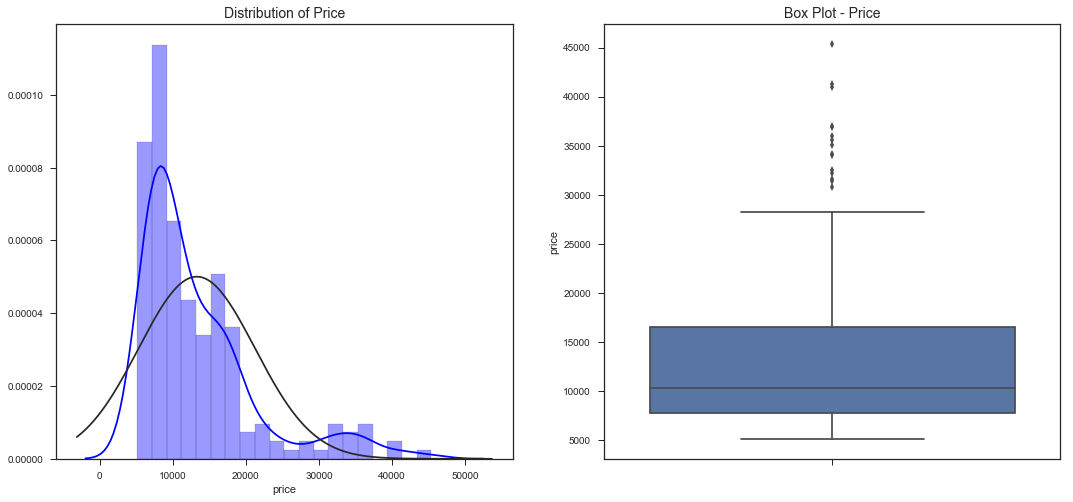

In [23]:
from scipy.stats import norm
from scipy import stats

fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.distplot(df['price'], hist = True, kde = True, bins = 20, ax=ax[0] , color = 'blue', 
             hist_kws={'edgecolor':'black'}, fit = norm)
ax[0].set_title('Distribution of Price',fontsize=14)
sns.boxplot(y = df['price'],ax=ax[1])
ax[1].set_title('Box Plot - Price',fontsize=14)


Price is skewed to good extent, but that is expected since car prices are that way. <br>
Expensive cars will sell lesser volumes, cheaper cars will sell more. <br>
Not dropping any outliers since we are expecting linear relationship anyway

#### Some bivariate analysis

In [24]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfaromeo,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
1,2,3,alfaromeo,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
2,3,1,alfaromeo,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
3,4,2,audi,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
4,5,2,audi,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00


(0, 30000)

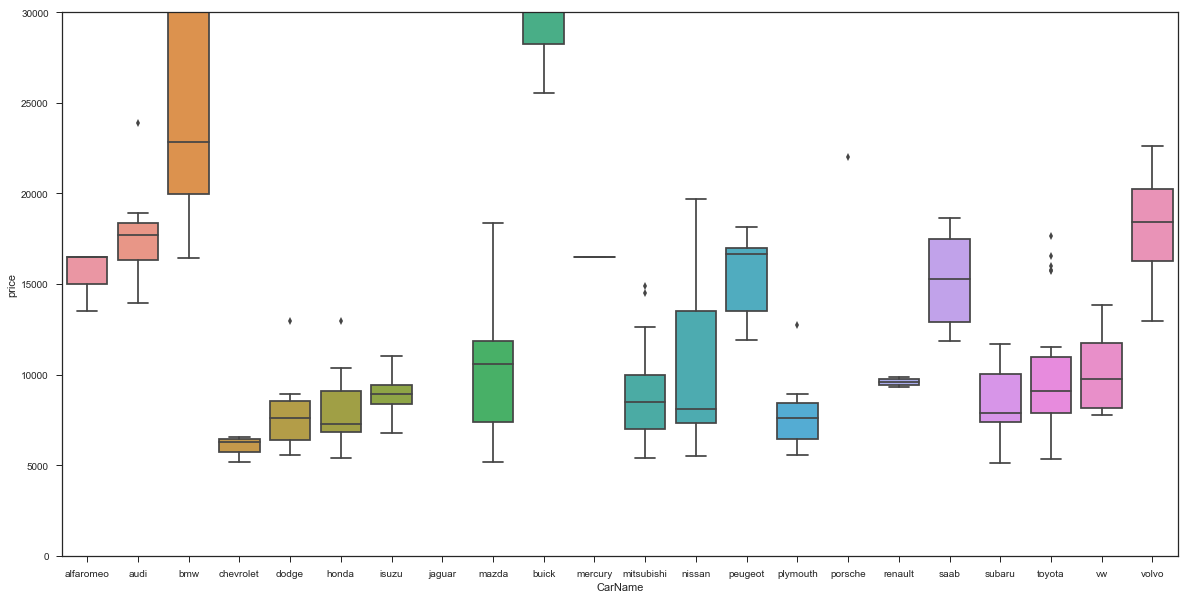

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df['CarName'], y=df['price'])
plt.ylim(0,30000)

Buick, BMW, Audi, Porsche and Volvo seem to be the most premium cars

(0, 30000)

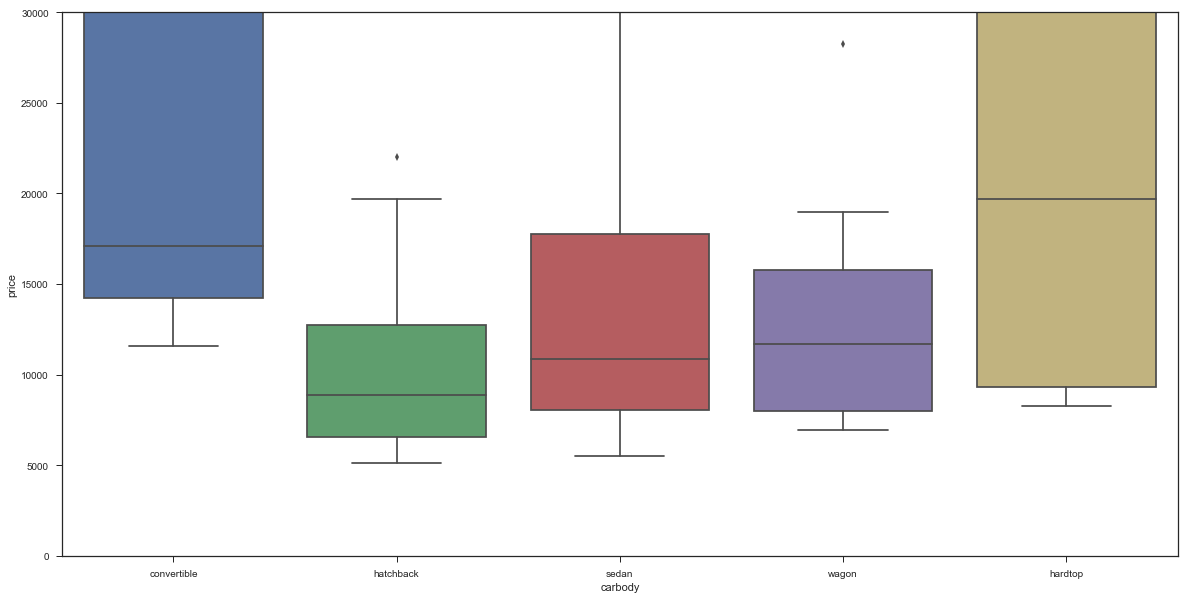

In [26]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df['carbody'], y=df['price'])
plt.ylim(0,30000)

If we do the full bivariate analysis for other columns we will see linear relationships with engine power, space etc. <br>
Before we move on lets see if we have any redundant info in hte data. 

### Removing redundant information
Lets see if we can refine the data set by removing some redundant variables and creating more useful derived metrics

In [27]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfaromeo,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
1,2,3,alfaromeo,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
2,3,1,alfaromeo,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
3,4,2,audi,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
4,5,2,audi,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00


In [28]:
df_dimensions=df[['wheelbase','carlength','carwidth','carheight','curbweight','price']]

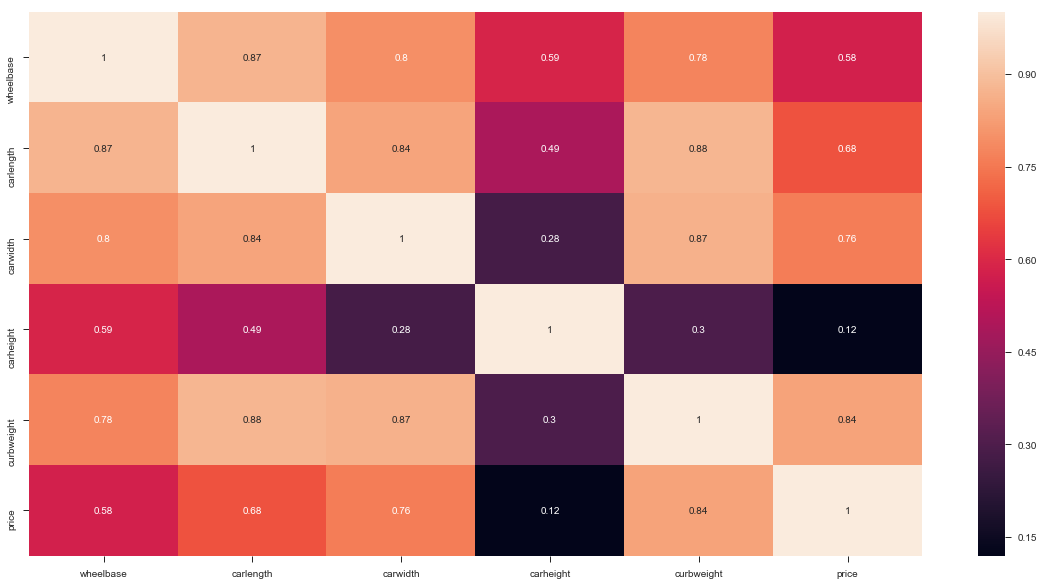

In [29]:
plt.figure(figsize = (20,10))  
sns.heatmap(df_dimensions.corr(),annot = True)

Pretty strong correlations across each of these, except carheight. Lets merge the other dimensions to one variable

In [30]:
df['dimensions']=df['carlength']*df['carwidth']*df['curbweight']*df['wheelbase']

In [31]:
df.drop(['carlength', 'carwidth','wheelbase','carheight'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,dimensions
0,1,3,alfaromeo,gas,std,two,convertible,rwd,front,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00,2442663356.22
1,2,3,alfaromeo,gas,std,two,convertible,rwd,front,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00,2442663356.22
2,3,1,alfaromeo,gas,std,two,hatchback,rwd,front,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00,2991491319.60
3,4,2,audi,gas,std,four,sedan,fwd,front,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00,2726703667.99
4,5,2,audi,gas,std,four,sedan,4wd,front,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00,3291621234.94


Now the mpg or mileage. We have city and highway mpg given, obviously these will be highly correlated. <br>
To derive a single combined mpg, we use following relation

Combined fuel economy is a weighted average of City and Highway MPG values that is calculated by weighting the City value by 55% and the Highway value by 45%.
Source: https://www.epa.gov/fueleconomy/text-version-gasoline-label 

In [32]:
df['combinedmpg']=(df['citympg']*55/100)+(df['highwaympg']*45/100)

In [33]:
df.drop(['citympg', 'highwaympg'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,dimensions,combinedmpg
0,1,3,alfaromeo,gas,std,two,convertible,rwd,front,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,13495.00,2442663356.22,23.70
1,2,3,alfaromeo,gas,std,two,convertible,rwd,front,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,16500.00,2442663356.22,23.70
2,3,1,alfaromeo,gas,std,two,hatchback,rwd,front,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,16500.00,2991491319.60,22.15
3,4,2,audi,gas,std,four,sedan,fwd,front,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,13950.00,2726703667.99,26.70
4,5,2,audi,gas,std,four,sedan,4wd,front,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,17450.00,3291621234.94,19.80


Next lets see if we can derive a power to weight ratio. This is often useful to measure true performance of cars, and is the ratio of horsepower to weight. 
Source: https://en.wikipedia.org/wiki/Power-to-weight_ratio 

In [34]:
df['powertoweight']=df['horsepower']/df['curbweight']

In [35]:
#Now we can get rid of horsepower and weight
df.drop(['horsepower', 'curbweight'],axis=1,inplace=True)

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

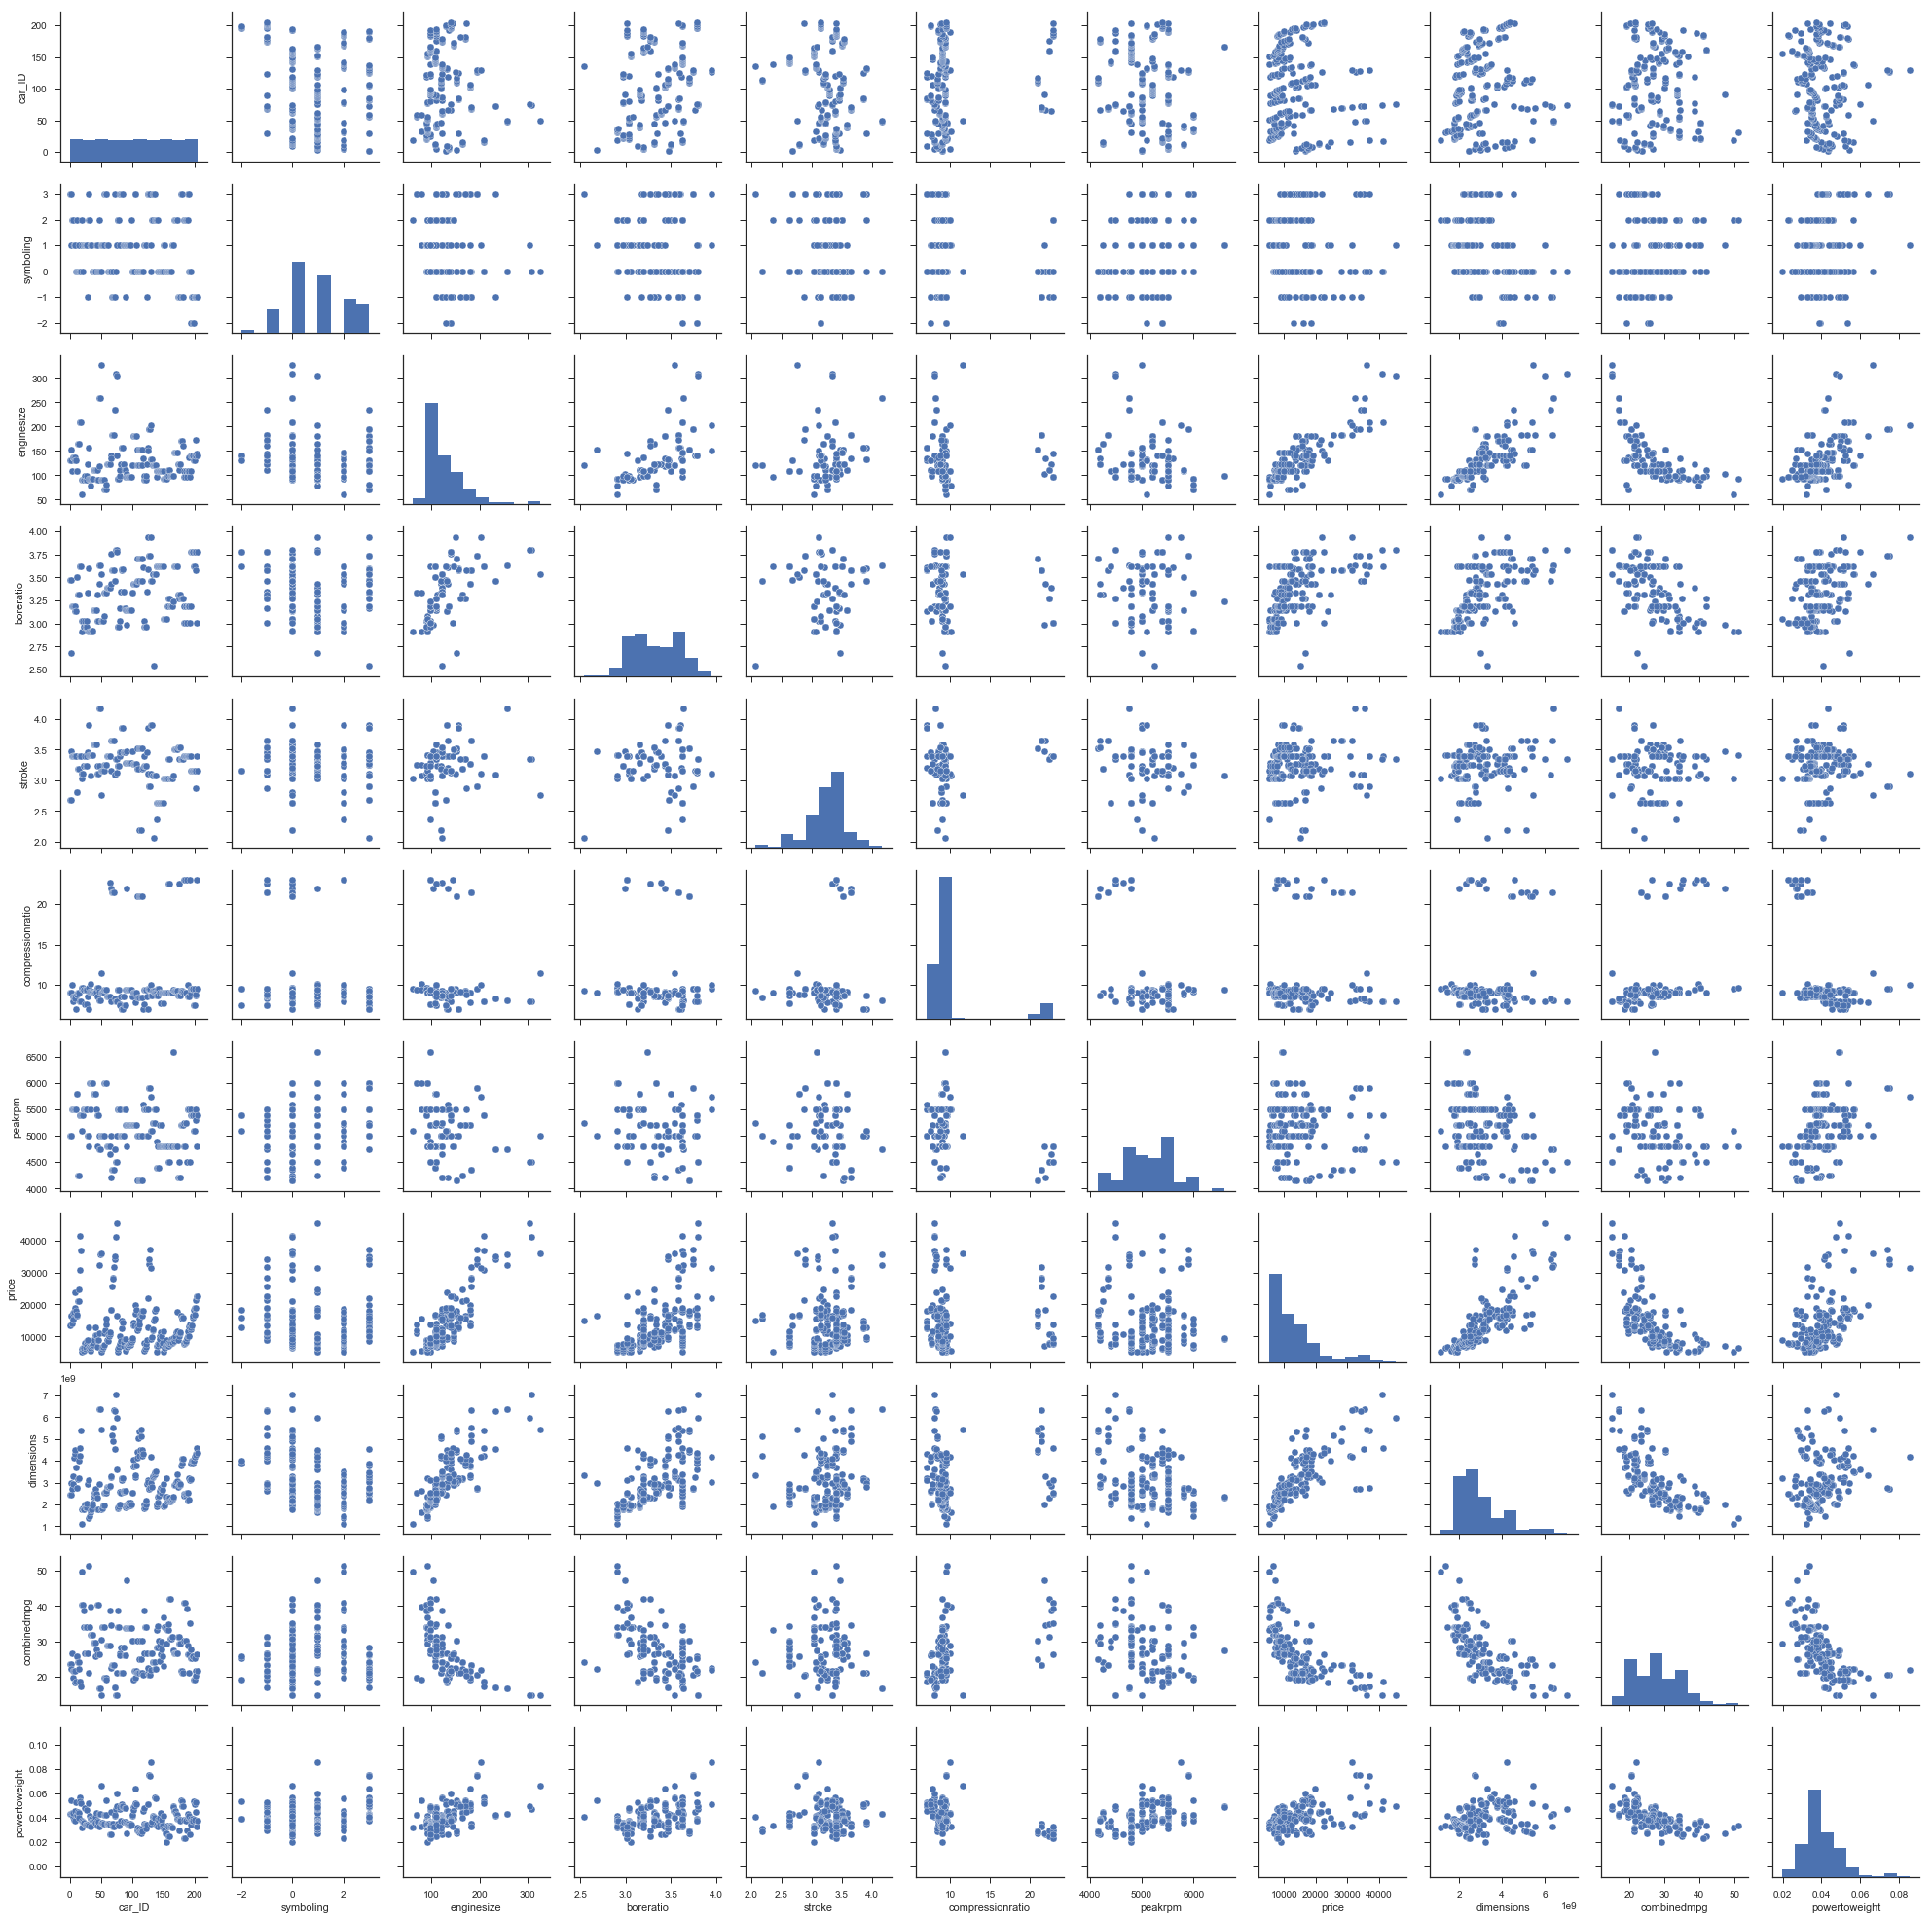

In [36]:
sns.pairplot(df)
plt.show()
#Doubleclick the graph to expand

Some clear linear relationships here..

#### Visualising Categorical Variables

There are a few categorical variables as well. Let's make plots for some of these variables.

In [37]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,peakrpm,price,dimensions,combinedmpg,powertoweight
0,1,3,alfaromeo,gas,std,two,convertible,rwd,front,dohc,four,130,mpfi,3.47,2.68,9.00,5000,13495.00,2442663356.22,23.70,0.04
1,2,3,alfaromeo,gas,std,two,convertible,rwd,front,dohc,four,130,mpfi,3.47,2.68,9.00,5000,16500.00,2442663356.22,23.70,0.04
2,3,1,alfaromeo,gas,std,two,hatchback,rwd,front,ohcv,six,152,mpfi,2.68,3.47,9.00,5000,16500.00,2991491319.60,22.15,0.05
3,4,2,audi,gas,std,four,sedan,fwd,front,ohc,four,109,mpfi,3.19,3.40,10.00,5500,13950.00,2726703667.99,26.70,0.04
4,5,2,audi,gas,std,four,sedan,4wd,front,ohc,five,136,mpfi,3.19,3.40,8.00,5500,17450.00,3291621234.94,19.80,0.04


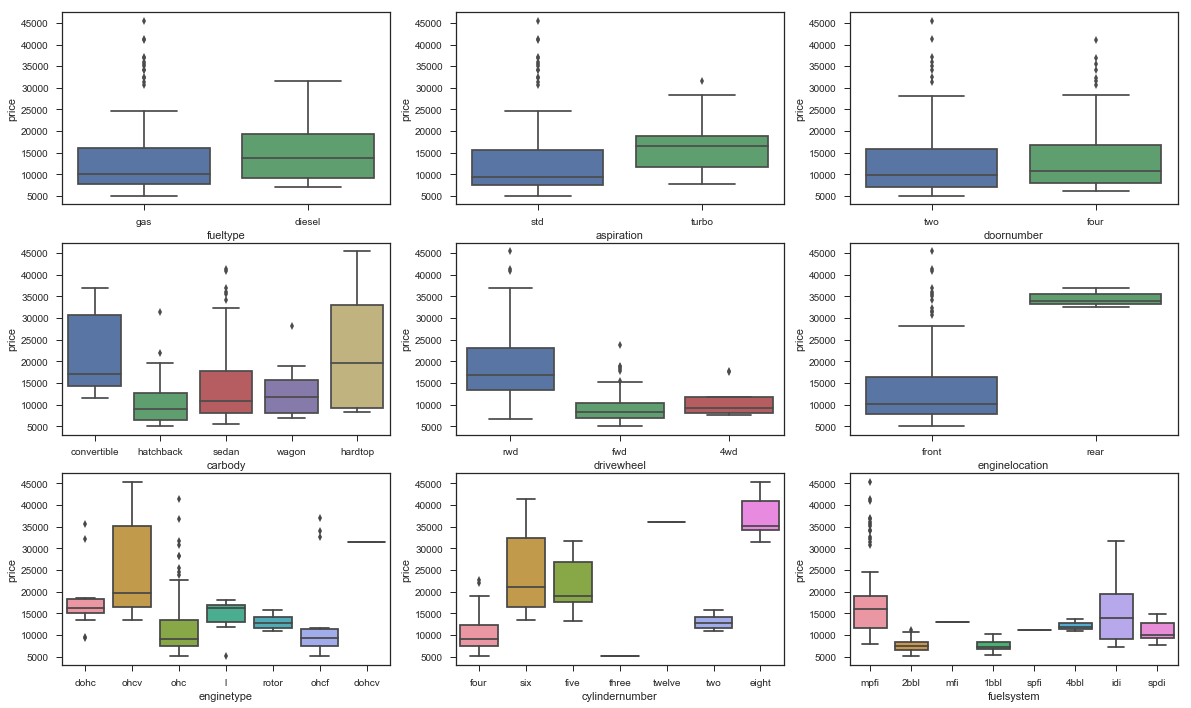

In [38]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.show()

Turbocharged cars are more expensive, so are convertible and rear wheel drive ones <br>
Rear engine cars are very expensive, this would be the sportscar types <br>
More cylinders also means more power, hence more expensive

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `carbody` with `doornumber` as the hue.

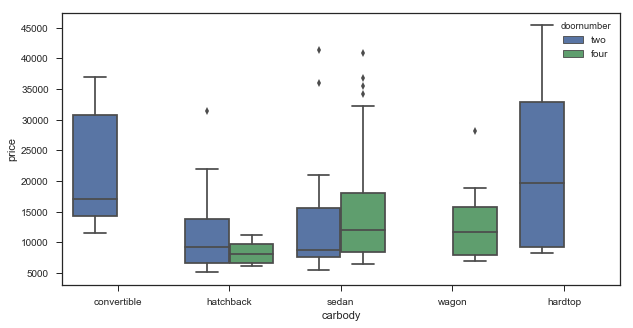

In [39]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'carbody', y = 'price', hue = 'doornumber', data = df)
plt.show()

All convertibles and hardtop cars are 2 door, all wagons are 4 door obviously

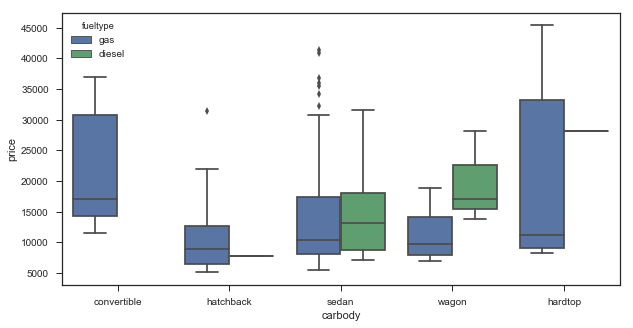

In [40]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'carbody', y = 'price', hue = 'fueltype', data = df)
plt.show()

Almost all convertibles, hardtops and hatchbacks are petrol powered. Diesel cars preferred for sedan or wagon body types <br>
Convertibles are clearly more expensive in general than the rest

## Step 3: Data Preparation

- Dataset has many columns with values as 'Yes' or 'No'.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s

In [41]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,peakrpm,price,dimensions,combinedmpg,powertoweight
0,1,3,alfaromeo,gas,std,two,convertible,rwd,front,dohc,four,130,mpfi,3.47,2.68,9.00,5000,13495.00,2442663356.22,23.70,0.04
1,2,3,alfaromeo,gas,std,two,convertible,rwd,front,dohc,four,130,mpfi,3.47,2.68,9.00,5000,16500.00,2442663356.22,23.70,0.04
2,3,1,alfaromeo,gas,std,two,hatchback,rwd,front,ohcv,six,152,mpfi,2.68,3.47,9.00,5000,16500.00,2991491319.60,22.15,0.05
3,4,2,audi,gas,std,four,sedan,fwd,front,ohc,four,109,mpfi,3.19,3.40,10.00,5500,13950.00,2726703667.99,26.70,0.04
4,5,2,audi,gas,std,four,sedan,4wd,front,ohc,five,136,mpfi,3.19,3.40,8.00,5500,17450.00,3291621234.94,19.80,0.04


In [42]:
df['fueltype'] = df['fueltype'].map({'gas': 1, 'diesel': 0})
df['aspiration'] = df['aspiration'].map({'std': 1, 'turbo': 0})
df['doornumber'] = df['doornumber'].map({'two': 1, 'four': 0})
df['enginelocation'] = df['enginelocation'].map({'front': 1, 'rear': 0})

In [43]:
# Check the dataframe now

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,peakrpm,price,dimensions,combinedmpg,powertoweight
0,1,3,alfaromeo,1,1,1,convertible,rwd,1,dohc,four,130,mpfi,3.47,2.68,9.00,5000,13495.00,2442663356.22,23.70,0.04
1,2,3,alfaromeo,1,1,1,convertible,rwd,1,dohc,four,130,mpfi,3.47,2.68,9.00,5000,16500.00,2442663356.22,23.70,0.04
2,3,1,alfaromeo,1,1,1,hatchback,rwd,1,ohcv,six,152,mpfi,2.68,3.47,9.00,5000,16500.00,2991491319.60,22.15,0.05
3,4,2,audi,1,1,0,sedan,fwd,1,ohc,four,109,mpfi,3.19,3.40,10.00,5500,13950.00,2726703667.99,26.70,0.04
4,5,2,audi,1,1,0,sedan,4wd,1,ohc,five,136,mpfi,3.19,3.40,8.00,5500,17450.00,3291621234.94,19.80,0.04


### Dummy Variables

Some categorical variables have more than 2 levels. We need to convert these levels into integer as well. <br> 
Number of dummy variables = number of unique values - 1

In [44]:
carbody_dummy = pd.get_dummies(df['carbody'], drop_first = True)
carbody_dummy.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [45]:
df = pd.concat([df, carbody_dummy], axis = 1)

In [46]:
# Now let's see the head of our dataframe.
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,peakrpm,price,dimensions,combinedmpg,powertoweight,hardtop,hatchback,sedan,wagon
0,1,3,alfaromeo,1,1,1,convertible,rwd,1,dohc,four,130,mpfi,3.47,2.68,9.00,5000,13495.00,2442663356.22,23.70,0.04,0,0,0,0
1,2,3,alfaromeo,1,1,1,convertible,rwd,1,dohc,four,130,mpfi,3.47,2.68,9.00,5000,16500.00,2442663356.22,23.70,0.04,0,0,0,0
2,3,1,alfaromeo,1,1,1,hatchback,rwd,1,ohcv,six,152,mpfi,2.68,3.47,9.00,5000,16500.00,2991491319.60,22.15,0.05,0,1,0,0
3,4,2,audi,1,1,0,sedan,fwd,1,ohc,four,109,mpfi,3.19,3.40,10.00,5500,13950.00,2726703667.99,26.70,0.04,0,0,1,0
4,5,2,audi,1,1,0,sedan,4wd,1,ohc,five,136,mpfi,3.19,3.40,8.00,5500,17450.00,3291621234.94,19.80,0.04,0,0,1,0


In [47]:
# Drop 'carbody' as we have created the dummies for it

df.drop(['carbody'], axis = 1, inplace = True)

Repeat the same for the other categorical variables

Before we dummify car name column, lets step back for a minute. <br>
Geely is trying to enter a new market, does it make sense to use previous car manufacturer's name as a factor?. <br>
Brand name has value, but for Geely, which is entering the space fresh, we shold be focussing on the car-related aspects. <br>
<br>
**Other car names should not really matter for Geely to come up with a pricing strategy. More so when we're trying to fit a linear regression model.** <br>

If Geely is interested in pricing their cars based on the competition, then we would need to do separate segement wise competitive analysis of brands and include that in pricing. 
But in this case we have a lot of automotive related data points to make the decision, and putting Car names into the mix wont really help. 

With these assumptions, we are dropping the CarName column altogether. 

In [48]:
df.drop(['CarName'], axis = 1, inplace = True)

In [49]:
for column in ['drivewheel', 'enginetype', 'cylindernumber','fuelsystem']:
    dummies = pd.get_dummies(df[column], drop_first = True)
    df[dummies.columns] = dummies
    df.drop([column], axis = 1, inplace = True)

In [50]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,enginesize,boreratio,stroke,compressionratio,peakrpm,price,dimensions,combinedmpg,powertoweight,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,1,1,1,1,130,3.47,2.68,9.00,5000,13495.00,2442663356.22,23.70,0.04,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2,3,1,1,1,1,130,3.47,2.68,9.00,5000,16500.00,2442663356.22,23.70,0.04,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,3,1,1,1,1,1,152,2.68,3.47,9.00,5000,16500.00,2991491319.60,22.15,0.05,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,4,2,1,1,0,1,109,3.19,3.40,10.00,5500,13950.00,2726703667.99,26.70,0.04,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,5,2,1,1,0,1,136,3.19,3.40,8.00,5500,17450.00,3291621234.94,19.80,0.04,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


We also dont need Car ID

In [51]:
df.drop(['car_ID'], axis = 1, inplace = True)

In [52]:
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,enginesize,boreratio,stroke,compressionratio,peakrpm,price,dimensions,combinedmpg,powertoweight,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,1,1,1,1,130,3.47,2.68,9.00,5000,13495.00,2442663356.22,23.70,0.04,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,3,1,1,1,1,130,3.47,2.68,9.00,5000,16500.00,2442663356.22,23.70,0.04,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,1,152,2.68,3.47,9.00,5000,16500.00,2991491319.60,22.15,0.05,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,1,1,0,1,109,3.19,3.40,10.00,5500,13950.00,2726703667.99,26.70,0.04,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,1,1,0,1,136,3.19,3.40,8.00,5500,17450.00,3291621234.94,19.80,0.04,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


What is symboling? 

In [53]:
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

Seems like symboling is a number between -2 and 3 <br>
A bit online research doesnt give us this info 

Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

It appears as if it is useful, so keeping it as a categorical variable as mentioned in dictionary

In [54]:
df['symboling'] = df['symboling'].map({3:'highrisk', 2:'mediumrisk', 1:'lowrisk', 0:'neutral', -1:'safe', -2:'mediumsafe' })

In [55]:
df['symboling'].unique()

array(['highrisk', 'lowrisk', 'mediumrisk', 'neutral', 'safe',
       'mediumsafe'], dtype=object)

In [56]:
#Now dummify it
symb_dummy = pd.get_dummies(df['symboling'], drop_first = True)
df = pd.concat([df, symb_dummy], axis = 1)
df.drop(['symboling'], axis = 1, inplace = True)

In [57]:
df.head()

,fueltype,aspiration,doornumber,enginelocation,enginesize,boreratio,stroke,compressionratio,peakrpm,price,dimensions,combinedmpg,powertoweight,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,lowrisk,mediumrisk,mediumsafe,neutral,safe
0,1,1,1,1,130,3.47,2.68,9.00,5000,13495.00,2442663356.22,23.70,0.04,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,1,1,1,130,3.47,2.68,9.00,5000,16500.00,2442663356.22,23.70,0.04,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,1,1,1,152,2.68,3.47,9.00,5000,16500.00,2991491319.60,22.15,0.05,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,1,0,1,109,3.19,3.40,10.00,5500,13950.00,2726703667.99,26.70,0.04,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,1,1,0,1,136,3.19,3.40,8.00,5500,17450.00,3291621234.94,19.80,0.04,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split, then we do scaling

In [58]:
from sklearn.model_selection import train_test_split

list(df)

['fueltype',
 'aspiration',
 'doornumber',
 'enginelocation',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'peakrpm',
 'price',
 'dimensions',
 'combinedmpg',
 'powertoweight',
 'hardtop',
 'hatchback',
 'sedan',
 'wagon',
 'fwd',
 'rwd',
 'dohcv',
 'l',
 'ohc',
 'ohcf',
 'ohcv',
 'rotor',
 'five',
 'four',
 'six',
 'three',
 'twelve',
 'two',
 '2bbl',
 '4bbl',
 'idi',
 'mfi',
 'mpfi',
 'spdi',
 'spfi',
 'lowrisk',
 'mediumrisk',
 'mediumsafe',
 'neutral',
 'safe']

In [59]:
Data = df[['fueltype',
 'aspiration',
 'doornumber',
 'enginelocation',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'peakrpm',
 'dimensions',
 'combinedmpg',
 'powertoweight',
 'hardtop',
 'hatchback',
 'sedan',
 'wagon',
 'fwd',
 'rwd',
 'dohcv',
 'l',
 'ohc',
 'ohcf',
 'ohcv',
 'rotor',
 'five',
 'four',
 'six',
 'three',
 'twelve',
 'two',
 '2bbl',
 '4bbl',
 'idi',
 'mfi',
 'mpfi',
 'spdi',
 'spfi',
 'lowrisk',
 'mediumrisk',
 'mediumsafe',
 'neutral',
 'safe']]


labels = df['price']

In [60]:
x_train, x_test, y_train, y_test = train_test_split(Data, labels, train_size=0.7 ,test_size = 0.3, random_state=100)

### Rescaling the Features 


We will use MinMax scaling.

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
scaler = MinMaxScaler()

In [63]:
x_train.head()

,fueltype,aspiration,doornumber,enginelocation,enginesize,boreratio,stroke,compressionratio,peakrpm,dimensions,combinedmpg,powertoweight,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,lowrisk,mediumrisk,mediumsafe,neutral,safe
122,1,1,0,1,98,2.97,3.23,9.40,5500,2191283598.66,34.15,0.03,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
125,1,1,1,1,151,3.94,3.11,9.50,5500,3028408128.27,22.60,0.05,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
166,1,1,1,1,98,3.24,3.08,9.40,6600,2346684480.00,27.35,0.05,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,1,1,1,130,3.47,2.68,9.00,5000,2442663356.22,23.70,0.04,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
199,1,0,0,1,130,3.62,3.15,7.50,5100,4177631732.74,19.25,0.05,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [64]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scaled_vars = ['enginesize','boreratio','stroke','compressionratio','peakrpm','dimensions','combinedmpg','powertoweight']

x_train[scaled_vars] = scaler.fit_transform(x_train[scaled_vars])

In [65]:
x_train.head()

,fueltype,aspiration,doornumber,enginelocation,enginesize,boreratio,stroke,compressionratio,peakrpm,dimensions,combinedmpg,powertoweight,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,lowrisk,mediumrisk,mediumsafe,neutral,safe
122,1,1,0,1,0.14,0.23,0.53,0.15,0.55,0.20,0.53,0.17,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
125,1,1,1,1,0.34,1.00,0.46,0.16,0.55,0.36,0.21,0.48,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
166,1,1,1,1,0.14,0.44,0.45,0.15,1.00,0.23,0.34,0.44,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,1,1,1,0.26,0.63,0.25,0.12,0.35,0.25,0.24,0.36,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
199,1,0,0,1,0.26,0.75,0.48,0.03,0.39,0.58,0.12,0.48,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [66]:
x_train.describe()

,fueltype,aspiration,doornumber,enginelocation,enginesize,boreratio,stroke,compressionratio,peakrpm,dimensions,combinedmpg,powertoweight,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,lowrisk,mediumrisk,mediumsafe,neutral,safe
count,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00
mean,0.91,0.82,0.44,0.99,0.24,0.50,0.54,0.19,0.40,0.35,0.36,0.30,0.02,0.34,0.48,0.13,0.59,0.35,0.01,0.06,0.69,0.08,0.06,0.03,0.06,0.74,0.13,0.01,0.01,0.03,0.35,0.02,0.09,0.00,0.44,0.04,0.00,0.30,0.12,0.01,0.35,0.09
std,0.29,0.39,0.50,0.08,0.15,0.21,0.16,0.24,0.20,0.22,0.19,0.14,0.14,0.48,0.50,0.34,0.49,0.48,0.08,0.24,0.47,0.28,0.24,0.17,0.24,0.44,0.34,0.08,0.08,0.17,0.48,0.14,0.29,0.00,0.50,0.20,0.00,0.46,0.32,0.12,0.48,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,0.00,1.00,0.14,0.31,0.46,0.10,0.27,0.17,0.20,0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,1.00,0.00,1.00,0.18,0.50,0.55,0.12,0.43,0.28,0.34,0.27,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1.00,1.00,1.00,1.00,0.30,0.68,0.61,0.15,0.55,0.47,0.51,0.36,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00


## Modelling


In [67]:
# Build a linear model with everything to start with

import statsmodels.api as sm
X_train_lm = sm.add_constant(x_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     54.56
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           2.01e-53
Time:                        22:36:28   Log-Likelihood:                -1266.6
No. Observations:                 143   AIC:                             2611.
Df Residuals:                     104   BIC:                             2727.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4547.4192   5805.248  

Here although the Rsquared is pretty good at 0.95, we see lot of variables having high p value. <br>
So we definitely need to bring down the number of variables. 

Since wehave a lot of variables to choose, it becomes unweidly to do feature selection manually. <br>
Lets select our features using RFE <br>

The limit of 10 variables was decided after trial and error. When we started from say 25 variables, the R-squared was a good result, but the model tends to overfit (doesnt perform well on test data) <br>

Hence we stick to small number of columns but keep train and test accuracy as close as possible. 

In [68]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm_1 = LinearRegression()
rfe = RFE(lm_1, 10)             
rfe = rfe.fit(x_train, y_train)

In [69]:
print(rfe.support_)           
print(rfe.ranking_)  

[False False False  True  True False  True False False  True False  True
 False False False False False False False False False False False  True
 False False False  True  True  True False False False False False False
 False False False  True False False]
[12 17 31  1  1 10  1 13  8  1  3  1  4  6  7  5 23 26 20 29  2  9 15  1
 16 25 18  1  1  1 28 24 11 33 30 14 32 21 19  1 22 27]


List of columns picked after RFE process

In [70]:
x_train.columns[rfe.support_]

Index(['enginelocation', 'enginesize', 'stroke', 'dimensions', 'powertoweight',
       'rotor', 'three', 'twelve', 'two', 'mediumsafe'],
      dtype='object')

In [71]:
x_train.columns


Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'dimensions',
       'combinedmpg', 'powertoweight', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor',
       'five', 'four', 'six', 'three', 'twelve', 'two', '2bbl', '4bbl', 'idi',
       'mfi', 'mpfi', 'spdi', 'spfi', 'lowrisk', 'mediumrisk', 'mediumsafe',
       'neutral', 'safe'],
      dtype='object')

Now the rejected ones

In [72]:
drop_col_list = x_train.columns[~rfe.support_]
drop_col_list

Index(['fueltype', 'aspiration', 'doornumber', 'boreratio', 'compressionratio',
       'peakrpm', 'combinedmpg', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'five', 'four',
       'six', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'lowrisk',
       'mediumrisk', 'neutral', 'safe'],
      dtype='object')

In [73]:
x_train1 = x_train.drop(drop_col_list,1)

In [74]:
x_train1.columns

Index(['enginelocation', 'enginesize', 'stroke', 'dimensions', 'powertoweight',
       'rotor', 'three', 'twelve', 'two', 'mediumsafe'],
      dtype='object')

In [75]:
x_train1.head()

,enginelocation,enginesize,stroke,dimensions,powertoweight,rotor,three,twelve,two,mediumsafe
122,1,0.14,0.53,0.20,0.17,0,0,0,0,0
125,1,0.34,0.46,0.36,0.48,0,0,0,0,0
166,1,0.14,0.45,0.23,0.44,0,0,0,0,0
1,1,0.26,0.25,0.25,0.36,0,0,0,0,0
199,1,0.26,0.48,0.58,0.48,0,0,0,0,0


## Modelling cycle begin

Lets use statsmodel api since we need to interpret the results

In [76]:
import statsmodels.api as sm  
x_train_lm = sm.add_constant(x_train1)

In [77]:
lr_1 = sm.OLS(y_train,x_train_lm).fit() 
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     95.32
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           1.41e-53
Time:                        22:36:31   Log-Likelihood:                -1340.5
No. Observations:                 143   AIC:                             2701.
Df Residuals:                     133   BIC:                             2731.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.161e+04   3424.360      3.

From the summary, we can draw the following conclusions. <br>
1. R squared and Adjusted Rsquared are pretty good at 0.86
2. Some variables have high p-values
<br>
Lets go ahead and get the VIF next

In [78]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
vif = pd.DataFrame()
vif['Features'] = x_train1.columns
vif['VIF'] = [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,rotor,inf
8,two,inf
1,enginesize,26.26
0,enginelocation,17.33
3,dimensions,17.20
2,stroke,14.88
4,powertoweight,9.40
7,twelve,1.53
6,three,1.03
9,mediumsafe,1.03


From VIF, we see `rotor` as a candidate for dropping. 

In [80]:
X = x_train1.drop('rotor', 1)

In [81]:
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [82]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     95.32
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           1.41e-53
Time:                        22:36:32   Log-Likelihood:                -1340.5
No. Observations:                 143   AIC:                             2701.
Df Residuals:                     133   BIC:                             2731.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.161e+04   3424.360      3.

In [83]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,26.26
0,enginelocation,17.33
3,dimensions,17.20
2,stroke,14.88
4,powertoweight,9.40
6,twelve,1.53
7,two,1.37
5,three,1.03
8,mediumsafe,1.03


Lets analyse here. Rsquared is 0.86, Adjusted Rsquared is 0.85, both being quite close to each other tells us that we're on the right track with variables. Looking at the variable list we have, the only ones we could remove are `mediumsafe` and `three` on basis of Pvalue, with VIF, we have `enginesize` <br>

Business logic tells us that engine size is a very important predictor in deciding price. So we need it. 
Lets see what happens when we drop `three`


In [84]:
X = X.drop('three', 1)

In [85]:
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()
print(lr_3.summary())
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           4.11e-54
Time:                        22:36:32   Log-Likelihood:                -1341.7
No. Observations:                 143   AIC:                             2701.
Df Residuals:                     134   BIC:                             2728.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.182e+04   3438.233      3.

,Features,VIF
1,enginesize,26.23
0,enginelocation,17.19
3,dimensions,17.18
2,stroke,14.88
4,powertoweight,9.40
5,twelve,1.53
6,two,1.37
7,mediumsafe,1.03


Very small impact on R2 score. Ovreall, we're headed in right direction. <br>
Now the pvalue for `mediumsafe` is quite high, lets see what happens when we drop it. 

In [86]:
X = X.drop('mediumsafe', 1)

In [87]:
X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     120.2
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           8.30e-55
Time:                        22:36:32   Log-Likelihood:                -1342.6
No. Observations:                 143   AIC:                             2701.
Df Residuals:                     135   BIC:                             2725.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.176e+04   3446.761      3.

,Features,VIF
1,enginesize,26.20
0,enginelocation,17.17
3,dimensions,17.06
2,stroke,14.83
4,powertoweight,9.40
5,twelve,1.53
6,two,1.37


Now, when we attempt to further drop `enginesize` for example, we see the R-score and the test accuracy dropping significantly. 
So we stop with feature engineering at this stage and go with lr_4 as the final model. 

In [88]:
'''X = X.drop('enginesize', 1)
'''

"X = X.drop('enginesize', 1)\n"

In [89]:
'''X_train_lm = sm.add_constant(X)
lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
'''

'X_train_lm = sm.add_constant(X)\nlr_5 = sm.OLS(y_train, X_train_lm).fit()\nprint(lr_5.summary())\nvif = pd.DataFrame()\nvif[\'Features\'] = X.columns\nvif[\'VIF\'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]\nvif[\'VIF\'] = round(vif[\'VIF\'], 2)\nvif = vif.sort_values(by = "VIF", ascending = False)\nvif\n'

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [90]:
y_train_price = lr_4.predict(X_train_lm)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Errors')

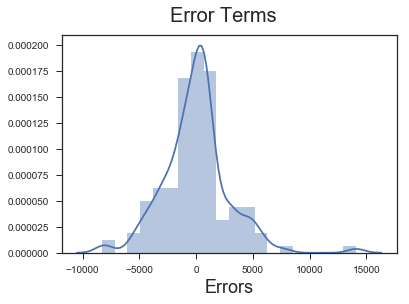

In [91]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

The error terms are showing a normal curve

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

For this, we will need the test data also to be in same shape and scale as train. 
First lets sort the columns

In [92]:
# List of columns dropped after RFE
drop_col_list

Index(['fueltype', 'aspiration', 'doornumber', 'boreratio', 'compressionratio',
       'peakrpm', 'combinedmpg', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'five', 'four',
       'six', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'lowrisk',
       'mediumrisk', 'neutral', 'safe'],
      dtype='object')

In [93]:
x_test = x_test.drop(drop_col_list,1)

In [94]:
# now the 2 other cols that were dropped after rfe  
x_test.drop(['two','three','mediumsafe'],axis=1,inplace=True)

Now we scale the test columns

In [95]:
X.columns

Index(['enginelocation', 'enginesize', 'stroke', 'dimensions', 'powertoweight',
       'twelve', 'two'],
      dtype='object')

In [96]:
x_test.columns

Index(['enginelocation', 'enginesize', 'stroke', 'dimensions', 'powertoweight',
       'rotor', 'twelve'],
      dtype='object')

In [97]:
scaled_vars = ['enginesize','stroke','dimensions','powertoweight']
x_test[scaled_vars] = scaler.fit_transform(x_test[scaled_vars])

Add the constants column

In [98]:
X_test_lm = sm.add_constant(x_test)

In [99]:
y_train_pred = lr_4.predict(X_train_lm)
res = (y_train - y_train_pred)
y_pred = lr_4.predict(X_test_lm)

Text(0,0.5,'ytest-ypred')

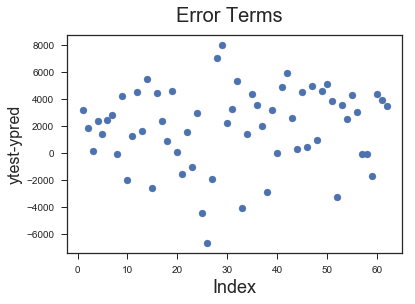

In [100]:


fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.scatter(c,y_test-y_pred)

fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

## Step 9: Model Evaluation
​
Let's now plot the graph for actual versus predicted values.

Text(0,0.5,'Predicted')

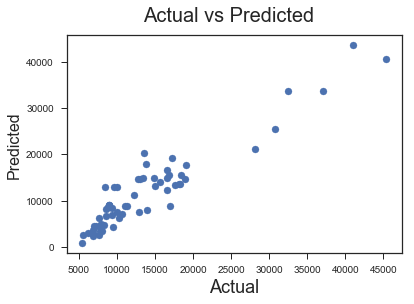

In [101]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('Actual vs Predicted', fontsize = 20)              # Plot heading 
plt.xlabel('Actual', fontsize = 18)                          # X-label
plt.ylabel('Predicted', fontsize = 16)      

Text(0,0.5,'Car Price')

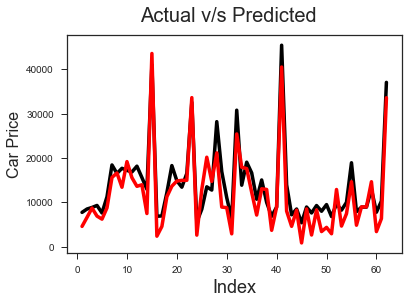

In [102]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="black", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual v/s Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)  

In [103]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8245712797755226

A quick check on the linear regression from sklearn. 

In [104]:
linreg = LinearRegression()
linreg.fit(X, y_train)
y_pred = linreg.predict(x_test)

In [105]:
print(linreg.score(X, y_train)*100,'% Train Accuracy')
print(linreg.score(x_test, y_test)*100,'% Prediction Accuracy')

86.17311395364311 % Train Accuracy
82.45712797755218 % Prediction Accuracy


## Step 10. Conclusions

Our task here was to analyse car prices and use Linear Regression analysis to decide what are the factors that can be used to determine car prices for Geely.  

After the analysis, the following conclusions can be made; 

1. The R-squared and Adjusted R-squared of the final model are 0.86 and 0.85 whic are quite close and so we can conclude that the variables are chosen appropriately and we dont have redundant data
2. From the plot of Error terms, we see that the error is not equally distributed and no pattern can be seen from the scatter plot. The error terms follow a normal distribution, which is one of the assumptions of Linear regression. 
3. The final R2-score of the model is 82.45%, which is quite close to the train accuracy of 86%. Hence we may conclude that the model is not prone to overfitting. 
4. Following are the final list of variables chosen for the model;
    - Engine Location - front or back
    - Engine Size - cubic capacity of engine
    - Stroke - Volume inside the engine
    - Dimensions - Length, width, height, wheelbase
    - Twelve cylinder - Whether the car engine has 12 cylinders
    - Two cylinder - Whether the car engine has 12 cylinders
5. A few steps that could be undertaken to further improve this analysis;
    - A separate case study to understand market sentiment for Geely products in the market.
    - A competition analysis to see who are the main rivals and where to best position Geely.
    - More comprehensive data set for pricing analysis - the above data set with 200 odd rows can be quite limiting considering the huge variety of cars and models that Geely would be compteting with. 